# Previsão de desempenho acadêmico com base em comportamento de estudo.

Com o avanço da educação digital e o crescimento das plataformas de ensino online, surgem novos desafios relacionados ao acompanhamento e à melhoria do desempenho dos estudantes. Em ambientes virtuais, os alunos apresentam níveis distintos de engajamento e participação, o que pode impactar diretamente seus resultados finais. A detecção precoce de comportamentos associados ao baixo desempenho é essencial para promover intervenções eficazes.

## 01. Relevância do tema

A educação é uma das principais ferramentas de transformação social. Identificar, por meio da análise de dados, os fatores que contribuem para o sucesso ou fracasso dos estudantes em plataformas online permite não apenas melhorar a performance individual, mas também fornecer insights para escolas, educadores e empresas edtech aprimorarem seus métodos de ensino. Além disso, o tema se alinha diretamente a áreas de atuação de empresas de tecnologia em dados, como a Semantix, que desenvolvem soluções analíticas para diversos setores, inclusive o educacional.

## Fonte de dados

Os dados utilizados neste projeto foram extraídos do Kaggle e fazem parte do conjunto **“Student Academic Performance Dataset (xAPI-Edu-Data)”**, disponível em:  
[https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data](https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data). 
Este dataset contém informações sobre comportamento e características de alunos em uma plataforma educacional, incluindo número de vezes que levantaram a mão, frequência às aulas, uso de recursos educacionais, envolvimento dos pais, entre outros fatores.

## Objetivo do projeto

O objetivo principal deste projeto é aplicar análise de dados para entender os principais fatores comportamentais e sociais que influenciam o desempenho acadêmico dos alunos. Através de técnicas exploratórias e eventualmente preditivas, buscaremos responder:

- Quais comportamentos mais se correlacionam com um bom desempenho?
- É possível prever o desempenho de um aluno com base em seu engajamento?

Com isso, espera-se propor caminhos para que educadores e plataformas de ensino possam agir de forma mais eficiente na prevenção do fracasso escolar em ambientes virtuais.

## 02. Carregamento e entendimento dos dados

In [89]:
import pandas as pd

In [90]:
# Carregar os dados
df = pd.read_csv("xAPI-Edu-Data.csv")

In [91]:
# Ver as primeiras linhas
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [92]:
# Ver as informções gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [93]:
# Ver as estatísticas descritivas
df.describe(include='all')

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


Quantas linhas tem, a média dos números, o valor mínimo e máximo, quais os valores mais comuns e quantas vezes cada coisa aparece.

## 03. Limpeza e pré-processamento dos dados

In [94]:
# Verificar valores ausentes
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [95]:
# Renomear colunas para português
from sklearn.preprocessing import LabelEncoder  # <-- IMPORTAÇÃO AQUI
df.rename(columns={
    'gender': 'genero',
    'NationalITy': 'nacionalidade',
    'PlaceofBirth': 'local_nascimento',
    'StageID': 'nivel_ensino',
    'GradeID': 'serie',
    'SectionID': 'turma',
    'Topic': 'disciplina',
    'Semester': 'semestre',
    'Relation': 'pais_juntos',
    'raisedhands': 'mao_levantada',
    'VisITedResources': 'visitou_recursos',
    'AnnouncementsView': 'visualizou_avisos',
    'Discussion': 'participou_discussao',
    'ParentAnsweringSurvey': 'pais_responderam_pesquisa',
    'ParentschoolSatisfaction': 'satisfacao_pais_escola',
    'StudentAbsenceDays': 'faltas',
    'Class': 'desempenho'
}, inplace=True)

# Exibir os novos nomes de colunas
print("Colunas renomeadas para o português:")
print(df.columns)

Colunas renomeadas para o português:
Index(['genero', 'nacionalidade', 'local_nascimento', 'nivel_ensino', 'serie',
       'turma', 'disciplina', 'semestre', 'pais_juntos', 'mao_levantada',
       'visitou_recursos', 'visualizou_avisos', 'participou_discussao',
       'pais_responderam_pesquisa', 'satisfacao_pais_escola', 'faltas',
       'desempenho'],
      dtype='object')


O código está pegando uma ferramenta pronta chamada LabelEncoder.

Essa ferramenta ajuda a transformar palavras (como "masculino", "feminino") em números (ex: 0, 1).

Computadores entendem melhor números do que palavras, então isso é importante para modelos de previsão.

In [96]:
# Verificar categorias únicas das colunas categóricas
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].unique()}")

#O código olha todas as colunas da tabela que têm palavras ou textos (tipo “masculino”, “feminino”).
#Para cada uma dessas colunas, ele mostra todos os valores diferentes que aparecem nela.
#Exemplo: se na coluna “genero” tem “M” e “F”, ele mostra só “M” e “F”.

genero: ['M' 'F']
nacionalidade: ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
local_nascimento: ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
nivel_ensino: ['lowerlevel' 'MiddleSchool' 'HighSchool']
serie: ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
turma: ['A' 'B' 'C']
disciplina: ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
semestre: ['F' 'S']
pais_juntos: ['Father' 'Mum']
pais_responderam_pesquisa: ['Yes' 'No']
satisfacao_pais_escola: ['Good' 'Bad']
faltas: ['Under-7' 'Above-7']
desempenho: ['M' 'L' 'H']


In [116]:
from sklearn.preprocessing import LabelEncoder

# Codificador exclusivo para desempenho
le_desempenho = LabelEncoder()
df['desempenho_codificado'] = le_desempenho.fit_transform(df['desempenho'])

# Gênero
df['genero'] = df['genero'].map({'M': 0, 'F': 1})

# Nível de ensino
df['nivel_ensino'] = df['nivel_ensino'].map({'lowerlevel': 0, 'MiddleSchool': 1, 'HighSchool': 2})

# Série (extrair número)
df['serie'] = df['serie'].astype(str).str.extract(r'G-(\d+)').fillna(0).astype(int)

# Turma
df['turma'] = df['turma'].map({'A': 0, 'B': 1, 'C': 2})

# Semestre
df['semestre'] = df['semestre'].map({'F': 0, 'S': 1})

# Pais juntos
df['pais_juntos'] = df['pais_juntos'].map({'Father': 0, 'Mum': 1})

# Respondeu pesquisa
df['pais_responderam_pesquisa'] = df['pais_responderam_pesquisa'].map({'No': 0, 'Yes': 1})

# Satisfação dos pais com a escola
df['satisfacao_pais_escola'] = df['satisfacao_pais_escola'].map({'Bad': 0, 'Good': 1})

# Faltas
df['faltas'] = df['faltas'].map({'Under-7': 0, 'Above-7': 1})

# Codificadores exclusivos para nacionalidade, local de nascimento e disciplina
le_nacionalidade = LabelEncoder()
df['nacionalidade_cod'] = le_nacionalidade.fit_transform(df['nacionalidade'])

le_nascimento = LabelEncoder()
df['local_nascimento_cod'] = le_nascimento.fit_transform(df['local_nascimento'])

le_disciplina = LabelEncoder()
df['disciplina_cod'] = le_disciplina.fit_transform(df['disciplina'])


## 04. Análise exploratória de dados (EDA)

## Distribuição do desempenho

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

#Ferramentas para fazer gráficos bonitos e fáceis.
#Seaborn e matplotlib são bibliotecas que ajudam a desenhar gráficos em Python.

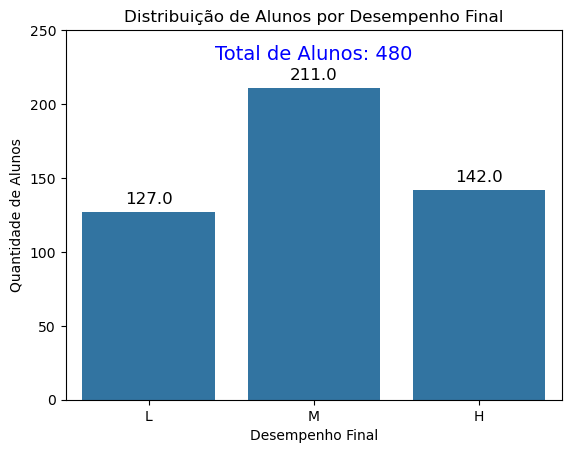

In [99]:
# Gráfico de barras para a variável 'desempenho'
ax = sns.countplot(x='desempenho', data=df, order=['L', 'M', 'H'])
plt.title('Distribuição de Alunos por Desempenho Final')
plt.xlabel('Desempenho Final')
plt.ylabel('Quantidade de Alunos')

# Adicionar anotações nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 9),
                textcoords='offset points')
#Adiciona números em cima das barras do gráfico.
#Esses números mostram exatamente quantos alunos estão naquela barra.

#Definir limite superior do eixo Y até 250
plt.ylim(0, 250)

# Calcular a quantidade total de alunos
total_alunos = len(df)

# Adicionar legenda com a quantidade total de alunos
plt.text(1, 230, f'Total de Alunos: {total_alunos}', ha='center', fontsize=14, color='blue')

plt.show()

### 4.1 Impacto do número de visitas no desempenho
### Gráfico de boxplot entre o número de visitas aos recursos ('visitedresources') e o desempenho final ('class')

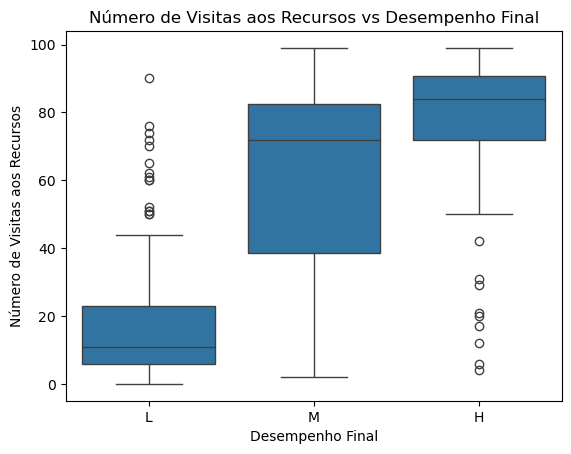

In [100]:
# Boxplots para variáveis comportamentais vs desempenho
sns.boxplot(x='desempenho', y='visitou_recursos', data=df, order=['L', 'M', 'H'])
plt.title('Número de Visitas aos Recursos vs Desempenho Final')
plt.xlabel('Desempenho Final')
plt.ylabel('Número de Visitas aos Recursos')
plt.show()

Alunos com melhor desempenho final (por exemplo, o grupo à direita, "H”) tendem a visitar mais recursos (a mediana e a caixa estão mais altas).

Já os alunos com pior desempenho (por exemplo, "L”) visitaram menos recursos em média.

O resultado para os 3 níveis variam de acordo com o número de visitas aos recursos. Observa-se que quanto mais visitas, melhores os resultados, embora existam valores fora da curva.

## 4.2 Impacto das Visualizações de Anúncios no Desempenho
## Gráfico de boxplot entre as visualizações de anúncios ('announcementsview') e o desempenho final ('class')

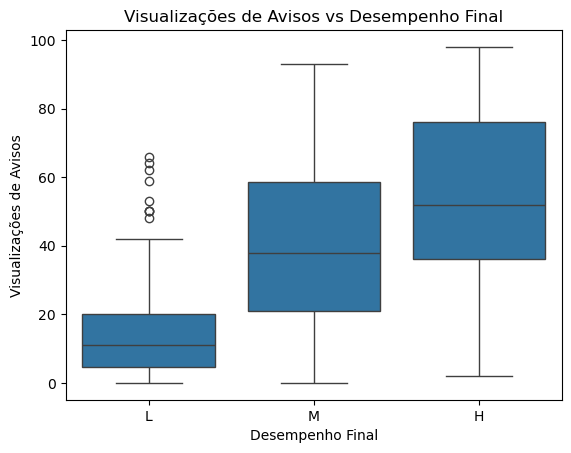

In [101]:
sns.boxplot(x='desempenho', y='visualizou_avisos', data=df, order=['L', 'M', 'H'])
plt.title('Visualizações de Avisos vs Desempenho Final')
plt.xlabel('Desempenho Final')
plt.ylabel('Visualizações de Avisos')
plt.show()

Alunos com Alto Desempenho (H):
Possuem maior mediana de visualizações de anúncios.
A caixa (entre Q1 e Q3) está mais elevada, indicando que, em geral, os alunos com bom desempenho acessaram bastante os anúncios.
Muitos valores acima da média (outliers) reforçam o engajamento com os comunicados da plataforma.

Alunos com Baixo Desempenho (L):
Têm a menor mediana de visualizações.
A distribuição é mais concentrada em valores baixos (entre 0 e 25 visualizações).
Isso sugere pouco interesse ou atenção aos avisos importantes, o que pode estar associado à menor organização e desempenho.

Alunos com Desempenho Médio (M):
Estão entre os dois extremos.
A mediana é intermediária, indicando um nível médio de engajamento.

Existe uma tendência clara: quanto maior o desempenho final, maior é o número de visualizações de anúncios.
Isso reforça a hipótese de que alunos mais atentos às comunicações pedagógicas tendem a ter melhor desempenho acadêmico.

## 4.3 Participação em Discussões e Desempenho
## Gráfico de boxplot entre a participação em discussões ('discussion') e o desempenho final ('class')

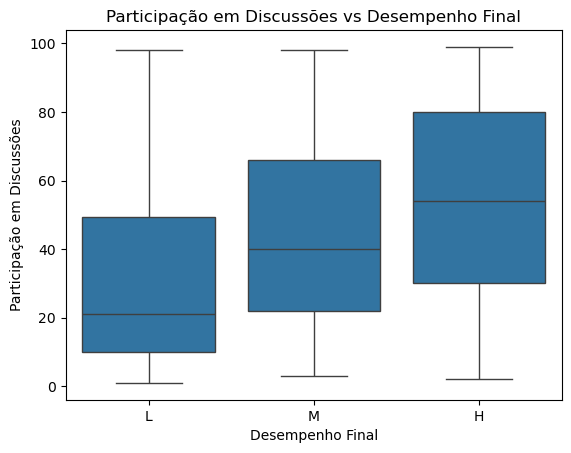

In [102]:
sns.boxplot(x='desempenho', y='participou_discussao', data=df, order=['L', 'M', 'H'])
plt.title('Participação em Discussões vs Desempenho Final')
plt.xlabel('Desempenho Final')
plt.ylabel('Participação em Discussões')
plt.show()

Alunos com Desempenho Alto (H):
Maior mediana de participação.
Maior dispersão de dados (indicando que muitos alunos participaram bastante).
Caixa mais elevada e ampla, sugerindo engajamento mais ativo em discussões, o que pode favorecer o aprendizado por meio da troca de ideias.

Alunos com Desempenho Baixo (L):
Mediana visivelmente mais baixa.
Participações concentradas em valores menores (poucos se engajaram nas discussões).
Isso pode indicar baixa interação com os colegas ou tutores, o que pode impactar negativamente o desempenho.

Desempenho Médio (M):
Mediana e distribuição intermediárias, como esperado.
Caixa larga, indicando variação significativa no comportamento do grupo.

Conclusão
Alunos que participaram mais das discussões tendem a ter melhor desempenho.
Isso pode ser porque interagir com o conteúdo, com colegas e professores estimula o aprendizado ativo, a resolução de dúvidas e maior fixação dos conteúdos.

## 4.4 Frequência de ausência escolar por categoria de desempenho final
## Gráfico de barras (countplot) ausência escolar vs desempenho final

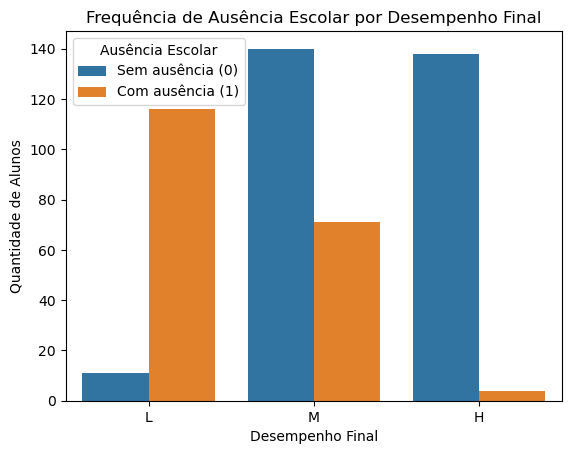

In [103]:
sns.countplot(x='desempenho', hue='faltas', data=df, order=['L', 'M', 'H'])
plt.title('Frequência de Ausência Escolar por Desempenho Final')
plt.xlabel('Desempenho Final')
plt.ylabel('Quantidade de Alunos')
plt.legend(title='Ausência Escolar', labels=['Sem ausência (0)', 'Com ausência (1)'])
plt.show()

Desempenho Baixo (L):
A maioria dos alunos com desempenho baixo teve ausência escolar (barra laranja maior).
Poucos alunos sem ausência tiveram desempenho baixo.

Desempenho Médio (M):
A maioria dos alunos sem ausência (barra azul) está nessa categoria.
Há também uma quantidade considerável de alunos com ausência.

Desempenho Alto (H):
Quase todos os alunos com desempenho alto não tiveram ausência escolar.
Praticamente nenhum aluno com ausência obteve desempenho alto.

Há uma relação clara entre ausência escolar e desempenho final:
Menos ausência → maior chance de bom desempenho.
Mais ausência → maior probabilidade de desempenho baixo.

## 4.5 Número de vezes que participou da aula vs desempenho final
## Gráfico de dispersão (scatter plot) para visualizar a relação entre o número de vezes que o aluno levantou a mão (raisedhands) e seu desempenho final (Class, que pode ser 'L', 'M' ou 'H').

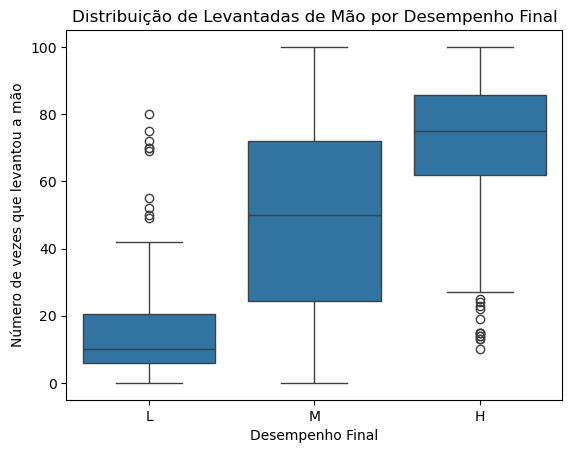

In [104]:
sns.boxplot(x='desempenho', y='mao_levantada', data=df, order=['L', 'M', 'H'])
plt.title('Distribuição de Levantadas de Mão por Desempenho Final')
plt.xlabel('Desempenho Final')
plt.ylabel('Número de vezes que levantou a mão')
plt.show()

Desempenho Baixo (L):
A maioria dos alunos com desempenho baixo levantou a mão poucas vezes.
A mediana está próxima de 10.
Alguns casos isolados levantaram a mão muitas vezes (outliers).

Desempenho Médio (M):
Distribuição mais ampla.
A mediana está em torno de 50 levantadas de mão.
Há bastante variação nesse grupo.

Desempenho Alto (H):
Os alunos com alto desempenho tendem a levantar a mão com mais frequência.

A mediana está entre 70 e 80.

Poucos alunos com desempenho alto levantaram a mão menos de 50 vezes.

## 5. Tendências e padrões

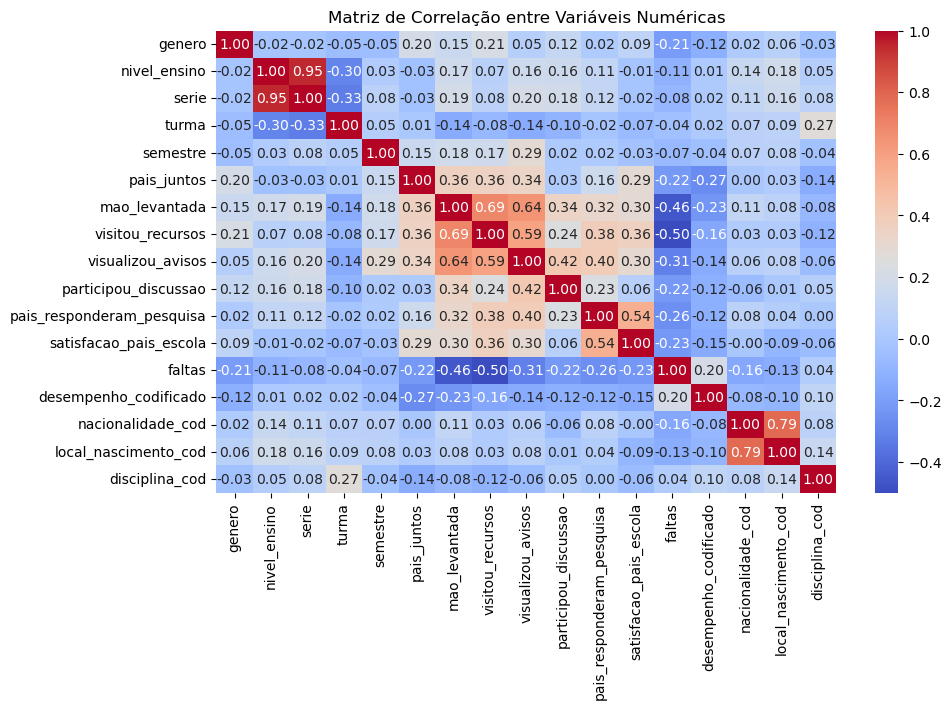

In [105]:
# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include='number')

# Calcular matriz de correlação
correlation_matrix = numeric_cols.corr()

# Plotar mapa de calor da correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

Correlações Fortes
stageid e gradeid → 0.95
Forte correlação positiva. Isso sugere que essas variáveis estão fortemente relacionadas, talvez até representem etapas ou níveis semelhantes no sistema educacional.

raisedhands e visitedresources → 0.69
Alunos que levantam a mão também tendem a visitar mais recursos. Pode indicar maior engajamento.
announcementsview e visitedresources → 0.59
Quem vê anúncios também costuma visitar recursos. Pode estar relacionado à proatividade.
parentansweringsurvey e parentschoolsatisfaction → 0.54
Pais que respondem à pesquisa tendem a estar satisfeitos com a escola.

Correlações Moderadas
raisedhands com announcementsview → 0.60
raisedhands com discussion → 0.54
discussion com announcementsview → 0.51
Essas variáveis podem representar diferentes formas de participação/engajamento do aluno.

Correlações Negativas Relevantes
studentabsencedays com raisedhands → -0.46
studentabsencedays com visitedresources → -0.46
studentabsencedays com announcementsview → -0.40

Estudantes com mais faltas tendem a interagir menos. Faz sentido, já que não estão presentes para interagir.

Sobre a variável class_encoded (provável variável-alvo)
Correlação moderada com:
raisedhands → 0.20
parentschoolsatisfaction → -0.15
studentabsencedays → -0.20

Isso sugere que:
Mais participação (mão levantada) está levemente associada a melhores classes.
Mais faltas e menor satisfação dos pais tendem a influenciar negativamente o desempenho do aluno.

O conjunto tem variáveis de comportamento (levantadas de mão, participação) que se correlacionam bem entre si.
studentabsencedays se destaca negativamente.

## Médias das variáveis por desempenho final

            mao_levantada  visitou_recursos  visualizou_avisos  \
desempenho                                                       
H               70.288732         78.746479          53.380282   
L               16.889764         18.322835          15.574803   
M               48.938389         60.635071          40.962085   

            participou_discussao  
desempenho                        
H                      53.661972  
L                      30.834646  
M                      43.791469  


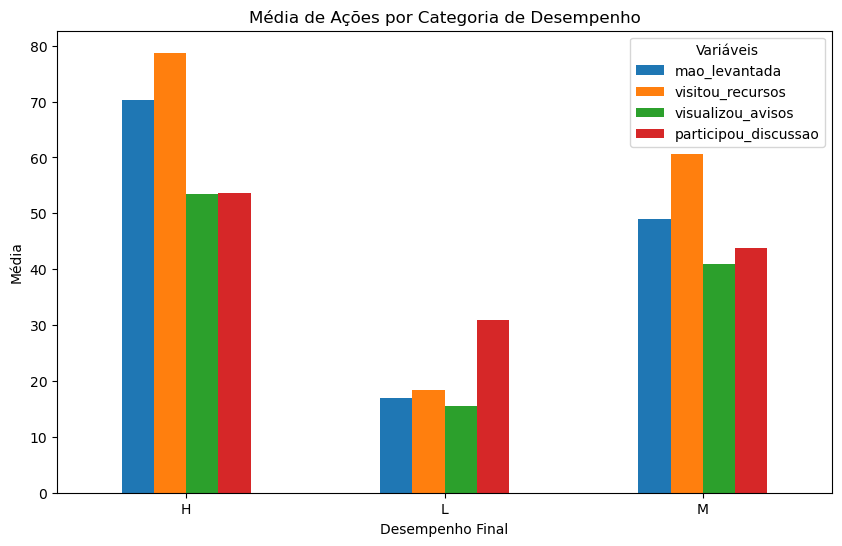

In [106]:
# Agrupar por desempenho e calcular média
mean_by_desempenho = df.groupby('desempenho')[['mao_levantada', 'visitou_recursos', 'visualizou_avisos', 'participou_discussao']].mean()

# Visualizar as médias
print(mean_by_desempenho)

# Visualizar graficamente
mean_by_desempenho.plot(kind='bar', figsize=(10,6))
plt.title('Média de Ações por Categoria de Desempenho')
plt.ylabel('Média')
plt.xlabel('Desempenho Final')
plt.xticks(rotation=0)
plt.legend(title='Variáveis')
plt.show()

## Participação dos pais vs desempenho escolar

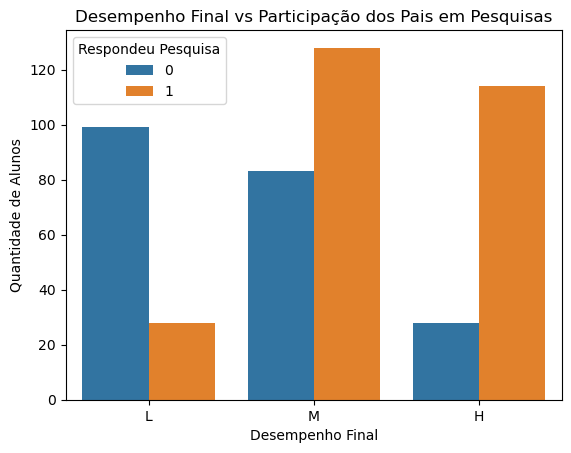

In [107]:
sns.countplot(x='desempenho', hue='pais_responderam_pesquisa', data=df, order=['L', 'M', 'H'])
plt.title('Desempenho Final vs Participação dos Pais em Pesquisas')
plt.xlabel('Desempenho Final')
plt.ylabel('Quantidade de Alunos')
plt.legend(title='Respondeu Pesquisa')
plt.show()

## Classificação em regressão logística (padrão de previsão)

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#Dividir os dados em treino e teste (train_test_split).
#Criar um modelo que prevê resultados (LogisticRegression).
#Avaliar se o modelo está funcionando bem (classification_report).

# Colunas para o modelo
variaveis_numericas = ['mao_levantada', 'visitou_recursos', 'visualizou_avisos', 'participou_discussao', 'faltas']
variaveis_binarias = ['pais_responderam_pesquisa', 'pais_juntos']  # assumindo que já estão 0/1
variaveis_categoricas = ['genero', 'nacionalidade', 'local_nascimento', 'nivel_ensino', 'serie', 'turma', 'disciplina', 'semestre']

# Se satisfacao_pais_escola for categórica, mapeie para numérico. Exemplo:
# df['satisfacao_pais_escola'] = df['satisfacao_pais_escola'].map({'muito satisfeito':3, 'satisfeito':2, 'insatisfeito':1, 'muito insatisfeito':0})

# Juntar as variáveis numéricas e binárias/Pega as colunas com números (ex: faltas, participação) e as colunas binárias (sim ou não).
df_model = df[variaveis_numericas + variaveis_binarias + ['satisfacao_pais_escola']]

# Criar dummies para variáveis categóricas/Transforma as colunas com textos (ex: gênero, turma) em várias colunas de 0 e 1, para o modelo entender.
df_dummies = pd.get_dummies(df[variaveis_categoricas], drop_first=True)

# Concatenar tudo para formar o X final
X = pd.concat([df_model, df_dummies], axis=1)
y = df['desempenho_codificado']

# Dividir em treino e teste/Depois, separa os dados em dois grupos: um para “aprender” (treino) e outro para “testar” se aprendeu bem (teste).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo com balanceamento
model = LogisticRegression(max_iter=3000, class_weight='balanced')
model.fit(X_train, y_train)

# Prever e avaliar
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.68      0.68        31
           1       0.75      0.93      0.83        45
           2       0.77      0.65      0.70        68

    accuracy                           0.74       144
   macro avg       0.73      0.75      0.74       144
weighted avg       0.74      0.74      0.74       144



Ele quer ensinar um computador a prever o desempenho de alunos (baixo, médio ou alto) com base em várias informações sobre eles, como participação, faltas, gênero, série, etc.
Primeiro, o código traz ferramentas prontas que ajudam a dividir dados, criar o modelo e avaliar se ele está bom.

Definir quais informações serão usadas
O código separa as informações em 3 grupos:
Numéricas: coisas que são números, tipo quantas vezes o aluno levantou a mão, quantas faltas teve.
Binárias: informações que só podem ser 0 ou 1, tipo "pais responderam pesquisa?" (sim=1, não=0), "pais moram juntos?" (sim=1, não=0).
Categóricas: informações que são categorias.

Transformar as informações para o modelo entender
O modelo de computador só entende números. Então:

Juntamos as variáveis numéricas e binárias (que já são números).
Para as informações categóricas, que são palavras (por exemplo, “masculino” ou “feminino”), o código cria "dummies" — que são colunas novas, onde cada categoria vira uma coluna com 0 ou 1 para mostrar se o aluno pertence àquela categoria ou não.

Juntar tudo
Agora, juntamos as variáveis numéricas, binárias e as “dummies” em uma tabela só, que é o que o modelo vai usar para aprender.

Separar dados para treino e teste
Dividimos os dados em dois grupos:
Treino (70%): para o modelo aprender as regras.
Teste (30%): para verificar se o modelo aprendeu bem e consegue acertar com dados que nunca viu antes.

Criar e treinar o modelo
Criamos um modelo de regressão logística, que é um tipo de algoritmo para classificar os alunos em baixo, médio ou alto desempenho.
Usamos um parâmetro chamado class_weight='balanced', que ajuda o modelo a dar atenção igual para todos os grupos (mesmo que alguns tenham menos alunos).
Pedimos para o modelo tentar até 3000 vezes ajustar a melhor resposta (para garantir que ele aprenda bem).

Fazer as previsões e avaliar o modelo
Depois que o modelo aprendeu, pedimos para ele prever o desempenho dos alunos do grupo de teste.
Por fim, mostramos um relatório com várias métricas que dizem se o modelo está acertando bastante ou não.

O que o relatório diz?
Ele mostra, para cada grupo (baixo, médio e alto desempenho), como o modelo se saiu em algumas coisas:

1. Precision (Precisão)
Quando o modelo disse “esse aluno é do grupo X”, qual a chance dele estar certo?
Por exemplo, se a precisão é 75% para o grupo 0, isso quer dizer:
De todas as vezes que o modelo falou que o aluno era do grupo 0, 75% estavam realmente certos.

2. Recall (Revocação)
De todos os alunos que realmente são do grupo X, quantos o modelo conseguiu identificar?
Se o recall é 93% para o grupo 0, quer dizer:
O modelo conseguiu reconhecer 93% de todos os alunos que são mesmo do grupo 0.

3. F1-score
É uma média entre a precisão e o recall — serve para resumir em um número só o quão bom o modelo foi.
Se for 83% para o grupo 0, significa que o modelo é bem eficiente para esse grupo.

4. Support
É quantos alunos daquele grupo apareceram no teste. Por exemplo, o grupo 0 tem 45 alunos para o modelo prever.

5. Accuracy (Acurácia)
É a porcentagem total de acertos do modelo para todos os grupos juntos.
Se for 74%, significa que o modelo acertou 74 em cada 100 alunos do teste.

O que isso tudo quer dizer na prática?
O modelo está muito bom para identificar alunos com baixo desempenho (grupo 0), acertando quase 93% desses alunos.
Para os outros grupos, médio (1) e alto (2), o modelo também está razoável, acertando cerca de 65-68% dos alunos.
No geral, o modelo acerta 74% dos casos.

# Classificação em regressão logística (Adicionando o escalonamento para melhoria de resultado)

In [110]:
from sklearn.preprocessing import StandardScaler

# Colunas para o modelo
variaveis_numericas = ['mao_levantada', 'visitou_recursos', 'visualizou_avisos', 'participou_discussao', 'faltas']
variaveis_binarias = ['pais_responderam_pesquisa', 'pais_juntos']  # assumindo que já estão 0/1
variaveis_categoricas = ['genero', 'nacionalidade', 'local_nascimento', 'nivel_ensino', 'serie', 'turma', 'disciplina', 'semestre']

# Se satisfacao_pais_escola for categórica, mapeie para numérico. Exemplo:
# df['satisfacao_pais_escola'] = df['satisfacao_pais_escola'].map({'muito satisfeito':3, 'satisfeito':2, 'insatisfeito':1, 'muito insatisfeito':0})

# Juntar as variáveis numéricas, binárias e satisfacao_pais_escola
df_model = df[variaveis_numericas + variaveis_binarias + ['satisfacao_pais_escola']]

# Criar dummies para variáveis categóricas
df_dummies = pd.get_dummies(df[variaveis_categoricas], drop_first=True)

# Concatenar tudo para formar o X final
X = pd.concat([df_model, df_dummies], axis=1)
y = df['desempenho_codificado']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalonar as variáveis numéricas e binárias
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo com balanceamento usando os dados escalonados
model = LogisticRegression(max_iter=3000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Prever e avaliar
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.71      0.69        31
           1       0.75      0.87      0.80        45
           2       0.75      0.65      0.69        68

    accuracy                           0.73       144
   macro avg       0.72      0.74      0.73       144
weighted avg       0.73      0.73      0.73       144



scaler = StandardScaler()
Aqui você está criando um "escala" (chamado scaler) que vai ajudar a deixar todas as suas variáveis parecidas, em uma mesma escala. Por exemplo, transformar uma variável que vai de 0 a 1000 para algo que vai de -3 a 3, assim tudo fica "na mesma língua".

X_train_scaled = scaler.fit_transform(X_train)
Agora você está ensinando o "escala" a entender como os dados de treino (X_train) são distribuídos, e já transformando esses dados para essa nova escala.

X_test_scaled = scaler.transform(X_test)
Depois, você usa o mesmo "escala" que aprendeu com os dados de treino para transformar os dados de teste (X_test). Assim, treino e teste ficam compatíveis.

model = LogisticRegression(max_iter=3000, class_weight='balanced')
Você cria um modelo de regressão logística, dizendo para ele tentar até 3000 vezes (iterações) para achar a melhor resposta, e avisando que as classes (grupos 0, 1 e 2) devem ser consideradas de forma equilibrada, mesmo que alguns apareçam menos.

model.fit(X_train_scaled, y_train)
Aqui o modelo aprende a relação entre as variáveis que você deu (X_train_scaled) e o que você quer prever (y_train).

y_pred = model.predict(X_test_scaled)
Agora o modelo tenta prever o desempenho (0, 1 ou 2) para os dados de teste (X_test_scaled) que ele nunca viu antes.

print(classification_report(y_test, y_pred))
Por fim, você imprime um relatório que diz como seu modelo foi bom em prever o desempenho certo.

# Previsão para um aluno novo

In [119]:
# Exemplo de dados de um aluno novo, com as mesmas colunas usadas no modelo
novo_aluno = {
    'mao_levantada': 5,
    'visitou_recursos': 1,
    'visualizou_avisos': 0,
    'participou_discussao': 1,
    'faltas': 2,
    'pais_responderam_pesquisa': 1,
    'pais_juntos': 0,
    'satisfacao_pais_escola': 3,
    # ... aqui você inclui os dados para as variáveis categóricas codificadas (dummies)
    # Exemplo: 'genero_Masculino': 1, 'nivel_ensino_Fundamental': 0, ...
}

# Transformar em DataFrame com a mesma estrutura do X de treino
import pandas as pd

novo_aluno_df = pd.DataFrame([novo_aluno])

# Ajustar colunas para bater exatamente com as usadas no modelo (mesmas dummies)
# Se faltarem colunas de dummies, adicionar com valor 0
for col in X.columns:
    if col not in novo_aluno_df.columns:
        novo_aluno_df[col] = 0

# Organizar colunas na mesma ordem do X
novo_aluno_df = novo_aluno_df[X.columns]

# Se usou escalonamento, aplicar o mesmo scaler
novo_aluno_scaled = scaler.transform(novo_aluno_df)

# Fazer a previsão
predicao = model.predict(novo_aluno_scaled)

# Mostrar resultado previsto (0, 1 ou 2)
print('Previsão de desempenho do novo aluno:', predicao[0])
df['desempenho_codificado'] = le.fit_transform(df['desempenho'])

Previsão de desempenho do novo aluno: 1


In [120]:
previsao_label = le.inverse_transform([predicao[0]])
print("Previsão de desempenho do novo aluno:", previsao_label[0])

Previsão de desempenho do novo aluno: L
